In [42]:
import pathlib

import pandas as pd

from bothunting import definitions

# Auxiliary functions

In [43]:
def show_head(df: pd.DataFrame):
    print(df.head())
    
def show_tail(df: pd.DataFrame):
    print(df.tail())
    
def get_header(df: pd.DataFrame):
    return list(df.columns)
    
def show_header(df: pd.DataFrame):
    print(get_header(df))
    
def print_sep():
    print(40*"-")

# Import feature data

In [44]:
prj_root = definitions.get_prj_root()
print(prj_root)

C:\Users\akasn\PycharmProjects\bothunting


In [45]:
path_features = prj_root / "bothunting" / "datasets" / "expanded_dataset"  / "complete_data.csv"
df = pd.read_csv(path_features)

In [46]:
show_head(df)
print_sep()
show_tail(df)

print(len(df))

           id               name      screen_name  statuses_count  \
0  1502026416    TASUKU HAYAKAWA         0918Bask            2177   
1  2492782375              ro_or         1120Roll            2660   
2   293212315           bearclaw        14KBBrown            1254   
3   191839658  pocahontas farida      wadespeters          202968   
4  3020965143           Ms Kathy  191a5bd05da04dc              82   

   followers_count  friends_count  favourites_count  listed_count  \
0              208            332               265             1   
1              330            485              3972             5   
2              166            177              1185             0   
3             2248            981             60304           101   
4               21             79                 5             0   

                      url lang  ...   test_set_2 is_protected  \
0                     NaN   ja  ...          0.0         True   
1                     NaN   ja  ...     

# Filter dataset

In [47]:
def filter_columns(df: pd.DataFrame):
    df = df.copy()
    header = get_header(df)
    idx = header.index("is_protected")
    new_header = ["id"] + header[idx:]
    print_sep()
    print(f"header={header}")
    print(f"new_header={new_header}")
    return df[new_header]
    
show_head(df)
df = filter_columns(df)
print_sep()
show_head(df)

           id               name      screen_name  statuses_count  \
0  1502026416    TASUKU HAYAKAWA         0918Bask            2177   
1  2492782375              ro_or         1120Roll            2660   
2   293212315           bearclaw        14KBBrown            1254   
3   191839658  pocahontas farida      wadespeters          202968   
4  3020965143           Ms Kathy  191a5bd05da04dc              82   

   followers_count  friends_count  favourites_count  listed_count  \
0              208            332               265             1   
1              330            485              3972             5   
2              166            177              1185             0   
3             2248            981             60304           101   
4               21             79                 5             0   

                      url lang  ...   test_set_2 is_protected  \
0                     NaN   ja  ...          0.0         True   
1                     NaN   ja  ...     

In [48]:
def filter_removed_accounts(df: pd.DataFrame):
    df = df.copy()
    return df[~pd.isnull(df["time_of_existence"])]

In [49]:
df = filter_removed_accounts(df)
print(len(df))

8613


In [50]:
df = df.dropna()
print(len(df))

8089


# Build machine learning models

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics

In [52]:
classifiers = {
    "MPLClassifier": MLPClassifier,
    "KNeighborsClassifier": KNeighborsClassifier,
    "SVC": SVC,
    #"GaussianProcessClassifier": GaussianProcessClassifier,
    # "RBF": RBF,
    "DecisionTreeClassifier": DecisionTreeClassifier,
    "RandomForestClassifier": RandomForestClassifier,
    "AdaBoostClassifier": AdaBoostClassifier,
    "GaussianNB": GaussianNB,
    "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis
}

In [53]:
X = df
X_header = get_header(X)[1:-1]
account_id, X, y = df["id"], df[X_header], df["result"]
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

confusion_matrices = {}
precision = {}
recall = {}
f1_score = {}

for clf_name in classifiers:
    print(f"Training and testing classifier {clf_name}")
    clf = classifiers[clf_name]()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    confusion_matrices[clf_name] = metrics.confusion_matrix(y_pred, y_test)
    f1_score[clf_name] = metrics.f1_score(y_test, y_pred, average="weighted")
    precision[clf_name] = metrics.precision_score(y_test, y_pred, average="weighted")
    recall[clf_name] = metrics.recall_score(y_test, y_pred, average="weighted")

for clf_name in classifiers:
    print(f"Classifier: {clf_name}")
    print(f"Confusion matrix: {confusion_matrices[clf_name]}")
    print(f"Precision: {precision[clf_name]}")
    print(f"Recall: {recall[clf_name]}")
    print(f"F1 score: {f1_score[clf_name]}")
    print_sep()

Training and testing classifier MPLClassifier
Training and testing classifier KNeighborsClassifier
Training and testing classifier SVC
Training and testing classifier DecisionTreeClassifier
Training and testing classifier RandomForestClassifier
Training and testing classifier AdaBoostClassifier
Training and testing classifier GaussianNB
Training and testing classifier QuadraticDiscriminantAnalysis
Classifier: MPLClassifier
Confusion matrix: [[ 531   25   50]
 [  26  318    2]
 [  63    6 1002]]
Precision: 0.9145426546027866
Recall: 0.9149777558082056
F1 score: 0.9146911929826721
----------------------------------------
Classifier: KNeighborsClassifier
Confusion matrix: [[ 549   22   40]
 [  26  325    1]
 [  45    2 1013]]
Precision: 0.9325669275414742
Recall: 0.9327731092436975
F1 score: 0.9326484535175324
----------------------------------------
Classifier: SVC
Confusion matrix: [[544  32 110]
 [ 32 313   6]
 [ 44   4 938]]
Precision: 0.8925200133312472
Recall: 0.8872960949085517
F1 

D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:706: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:706: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:709: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set t

In [54]:
f1_scores = []
recall_scores = []
precision_scores = []

for clf_name in classifiers:
    f1_scores.append(f1_score[clf_name])
    recall_scores.append(recall[clf_name])
    precision_scores.append(precision[clf_name])
print(f1_scores)
print(recall_scores)
print(precision_scores)

[0.9146911929826721, 0.9326484535175324, 0.8887201204236311, 0.911299076402523, 0.950494957533688, 0.8807301355059899, 0.5516539834717972, 0.14378723379583525]
[0.9149777558082056, 0.9327731092436975, 0.8872960949085517, 0.912011863568957, 0.9500741473059812, 0.8803756796836382, 0.661888284725655, 0.3064755313890262]
[0.9145426546027866, 0.9325669275414742, 0.8925200133312472, 0.9112089880123675, 0.9520390021175914, 0.8820637390230848, 0.745874790406427, 0.093927251340186]


In [55]:
import matplotlib.pyplot as plt
import numpy as np

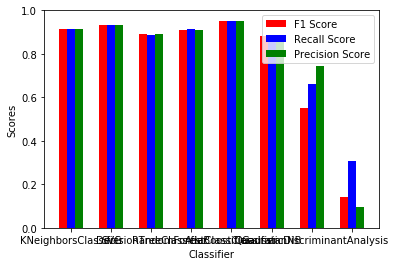

In [56]:
plot = plt.subplot(111)
plot.bar(np.arange(len(classifiers))-0.2, f1_scores, width = 0.2, color = "r", align = "center", label = "F1 Score")
plot.bar(np.arange(len(classifiers)), recall_scores, width = 0.2, color = "b", align = "center", label = "Recall Score")
plot.bar(np.arange(len(classifiers))+0.2, precision_scores, width = 0.2, color = "g", align = "center", label = "Precision Score")
plot.set_xticklabels(classifiers)
plot.set_ylabel("Scores")
plot.set_xlabel("Classifier")
plot.legend(loc = "upper right")

plt.show()

In [111]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [98]:
X = df
X_header = get_header(X)[1:-1]
account_id, X, y = df["id"], df[X_header], df["result"]
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
print(metrics.f1_score(y_test, y_pred, average="weighted"))
print(metrics.precision_score(y_test, y_pred, average="weighted"))
print(metrics.recall_score(y_test, y_pred, average="weighted"))

0.950541063467919
0.9524485330333207
0.9500741473059812


In [96]:
rf_random = RandomizedSearchCV(estimator = RFC, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.0min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [97]:
print(rf_random.best_params_)

{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}


In [106]:
RFC_1 = RandomForestClassifier(n_estimators = 1000, min_samples_split = 2, min_samples_leaf=1, max_features = "sqrt", max_depth=20, bootstrap = "True")
RFC_1.fit(X_train, y_train)
y_pred_1 = RFC_1.predict(X_test)
print(metrics.f1_score(y_test, y_pred_1, average="weighted"))
print(metrics.precision_score(y_test, y_pred_1, average="weighted"))
print(metrics.recall_score(y_test, y_pred_1, average="weighted"))

0.9524306865383891
0.9538629690958218
0.9520514087988137


In [107]:
print("Difference F1 Score: ")
print(metrics.f1_score(y_test, y_pred_1, average="weighted")-metrics.f1_score(y_test, y_pred, average="weighted"))

print("Difference Precision Score: ")
print(metrics.precision_score(y_test, y_pred_1, average="weighted")-metrics.precision_score(y_test, y_pred, average="weighted"))

print("Difference Recall Score: ")
print(metrics.recall_score(y_test, y_pred_1, average="weighted")-metrics.recall_score(y_test, y_pred, average="weighted"))

#Minimale Veränderungen in positive/negative Richtung (je nach Iteration)

Difference F1 Score: 
0.0004789049807133461
Difference Precision Score: 
0.0003064105766360514
Difference Recall Score: 
0.0004943153732080985


In [115]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,20,30,40],
    'max_features': ["sqrt"],
    'min_samples_leaf': [1,2],
    'min_samples_split': [2,4,6],
    'n_estimators': [600,800,1000,1200,1400]
}

In [116]:
grid_search = GridSearchCV(estimator = RFC, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  7.4min finished


{'bootstrap': True, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}


In [120]:
RFC_2 = RandomForestClassifier(n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features="sqrt", max_depth=40, bootstrap="True")
RFC_2.fit(X_train, y_train)
y_pred_2 = RFC_2.predict(X_test)
print(metrics.f1_score(y_test, y_pred_2, average="weighted"))
print(metrics.precision_score(y_test, y_pred_2, average="weighted"))
print(metrics.recall_score(y_test, y_pred_2, average="weighted"))

0.9524346648510107
0.9538579627070335
0.9520514087988137


In [121]:
print("Difference F1 Score: ")
print(metrics.f1_score(y_test, y_pred_2, average="weighted")-metrics.f1_score(y_test, y_pred_1, average="weighted"))

print("Difference Precision Score: ")
print(metrics.precision_score(y_test, y_pred_2, average="weighted")-metrics.precision_score(y_test, y_pred_1, average="weighted"))

print("Difference Recall Score: ")
print(metrics.recall_score(y_test, y_pred_2, average="weighted")-metrics.recall_score(y_test, y_pred_1, average="weighted"))

#Minimale Veränderungen in positive/negative Richtung (je nach Iteration)

Difference F1 Score: 
3.978312621555347e-06
Difference Precision Score: 
-5.006388788308946e-06
Difference Recall Score: 
0.0


In [ ]:
# Login for the Twitter API: (Tweepy has to be imported as tw)
def login(consumer_key, consumer_secret, access_token, access_token_secret):
    auth = tw.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
# Method for predicitions using the Random Forest Classifier
def Random_Forest_predict(df, target):
    X = df
    X_header = get_header(X)[1:-1]
    account_id, X, y = df["id"], df[X_header], df["result"]
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)
    RFC = RandomForestClassifer()
    RFC.fit(X_train, y_train)
    y_pred = RFC.predict(target)
    print(y_pred)